## Data Prep

In [91]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#### Read data from different sheets

In [92]:
Main_data = pd.read_excel('climate_change_download_0.xlsx')
Main_data.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,AFG,Afghanistan,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,..,..,..,..,...,4.622149,7.259298,5.502361,5.840148,6.085466,5.940385,5.779478,4.843049,..,..
2,AFG,Afghanistan,AG.YLD.CREL.KG,Cereal yield (kg per hectare),0,0,1200.6,1160,1097.7,1135.5,...,1669.7,1458,1334.8,1790.4,1551.6,1913.5,1418.1,2031.3,..,..
3,AFG,Afghanistan,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",0,1,..,..,..,..,...,1.152364,1.212725,3.276532,3.976666,3.08213,2.495036,2.551583,..,..,..
4,AFG,Afghanistan,EG.ELC.ACCS.ZS,Access to electricity (% of total population),0,1,..,..,..,..,...,..,..,..,..,..,..,..,15.6,..,..


#### Convert "Year" to long format

In [93]:
Main_data_long = Main_data.melt(
    id_vars=["Country code", "Country name", "Series code", "Series name", "SCALE", "Decimals"],      # columns to keep
    var_name="Year",       # new column for former year column names
    value_name="Value"     # new column for values
)

# Convert Year to numeric 
Main_data_long["Year"] = pd.to_numeric(Main_data_long["Year"], errors="coerce")

Main_data_long.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
0,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0
1,AFG,Afghanistan,AG.LND.IRIG.AG.ZS,Agricultural land under irrigation (% of total...,0,1,1990,..
2,AFG,Afghanistan,AG.YLD.CREL.KG,Cereal yield (kg per hectare),0,0,1990,1200.6
3,AFG,Afghanistan,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",0,1,1990,..
4,AFG,Afghanistan,EG.ELC.ACCS.ZS,Access to electricity (% of total population),0,1,1990,..


#### Convert "Series name" to wide format

In [94]:

# Convert Value to numeric (non-numeric will become NaN)
Main_data_long['Value'] = pd.to_numeric(Main_data_long['Value'], errors='coerce')

# Then pivot normally
df_wide = Main_data_long.pivot_table(
    index=['Country code', 'Country name', 'Year'],
    columns='Series name',
    values='Value',
    aggfunc='first'   # use 'first' to avoid mean aggregation
).reset_index()

# Remove the column name hierarchy
df_wide.columns.name = None

# Show output
df_wide.head()

,Country code,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,ABW,Aruba,1990,NaN,NaN,100.0,NaN,NaN,NaN,29.620641,...,29.57482,1.820254,NaN,NaN,NaN,NaN,NaN,NaN,31259.941,1.780501
1,ABW,Aruba,1991,NaN,NaN,NaN,NaN,NaN,NaN,29.838835,...,NaN,3.936181,NaN,NaN,NaN,NaN,NaN,NaN,32321.000,3.337974
2,ABW,Aruba,1992,NaN,NaN,NaN,NaN,NaN,NaN,25.239288,...,NaN,5.484041,NaN,NaN,NaN,NaN,NaN,NaN,33938.142,4.882234
3,ABW,Aruba,1993,NaN,NaN,NaN,NaN,NaN,NaN,24.405233,...,NaN,6.088818,NaN,NaN,NaN,NaN,NaN,NaN,35851.062,5.483368
4,ABW,Aruba,1994,NaN,NaN,NaN,NaN,NaN,NaN,22.977867,...,NaN,5.611677,NaN,NaN,NaN,NaN,NaN,NaN,37690.142,5.002538


In [95]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5085 entries, 0 to 5084
Data columns (total 51 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country code                                                      5085 non-null   object 
 1   Country name                                                      5085 non-null   object 
 2   Year                                                              5085 non-null   int64  
 3   Access to electricity (% of total population)                     99 non-null     float64
 4   Access to improved sanitation (% of total pop.)                   968 non-null    float64
 5   Access to improved water source (% of total pop.)                 988 non-null    float64
 6   Agricultural land under irrigation (% of total ag. land)          442 non-null    float64
 7   Annual freshwater withdrawals (% 

#### Find percentage of missing value in the data

In [96]:
# Calculate missing values count and percentage
missing_count = df_wide.isnull().sum()
missing_percent = (missing_count / len(df_wide)) * 100

# Combine into a single DataFrame
missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

missing_table.head(48)

,Missing Count,Missing %
Issued Emission Reduction Units (ERUs) from JI (thousands),5077,99.842675
Hosted Joint Implementation (JI) projects,5068,99.665683
Issued Certified Emission Reductions (CERs) from CDM (thousands),5010,98.525074
Disaster risk reduction progress score (1-5 scale; 5=best),5001,98.348083
Hosted Clean Development Mechanism (CDM) projects,4993,98.190757
Access to electricity (% of total population),4986,98.053097
"Malaria incidence rate (per 100,000 people)",4975,97.836775
"Droughts, floods, extreme temps (% pop. avg. 1990-2009)",4917,96.696165
"Average annual precipitation (1961-1990, mm)",4885,96.066863
Annual freshwater withdrawals (% of internal resources),4804,94.473943


Many sustainability and health indicators are sparse, while economic and demographic data are relatively complete

#### Find the country with least missing data

In [97]:
# Compute % missing data per country (modern syntax)
missing_data_country = (
    df_wide.groupby("Country name", group_keys=False)
    .apply(lambda x: x.drop(columns=["Country name"], errors="ignore")
                     .isna().mean().mean() * 100)
)

# Sort by least missing data
least_missing = missing_data_country.sort_values(ascending=True)

# Show top 10
print(least_missing.head(10))

Country name
Mexico       47.909091
Indonesia    49.272727
Poland       49.363636
Malaysia     50.272727
Colombia     50.545455
Turkey       50.818182
India        50.818182
Chile        50.818182
Hungary      50.909091
Argentina    50.909091
dtype: float64


C:\Users\jason\AppData\Local\Temp\ipykernel_26784\3819671603.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.drop(columns=["Country name"], errors="ignore")


In [98]:
# Define the top 10 countries (least missing data)
top10_countries = [
    "Mexico", "Indonesia", "Poland", "Malaysia", "Colombia",
    "Turkey", "India", "Chile", "Romania", "Argentina"
]

# Filter only those countries
df_filtered = df_wide[df_wide["Country name"].isin(top10_countries)]


## Data Cleaning

#### Sanity checks

In [99]:
print("Rows, Cols:", df_filtered.shape)
print("Duplicate rows:", df_filtered.duplicated().sum())
print("\nDtypes:")
print(df_filtered.dtypes.head(12))

Rows, Cols: (220, 51)
Duplicate rows: 0

Dtypes:
Country code                                                 object
Country name                                                 object
Year                                                          int64
Access to electricity (% of total population)               float64
Access to improved sanitation (% of total pop.)             float64
Access to improved water source (% of total pop.)           float64
Agricultural land under irrigation (% of total ag. land)    float64
Annual freshwater withdrawals (% of internal resources)     float64
Average annual precipitation (1961-1990, mm)                float64
CO2 emissions per capita (metric tons)                      float64
CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)    float64
CO2 emissions, total (KtCO2)                                float64
dtype: object


#### Replace missing value

In [100]:
missing_tokens = {"..", "NA", "N/A", "na", "n/a", "", "—", "-"}

df_filtered = df_filtered.copy()

for c in df_filtered.columns:
    if df_filtered[c].dtype == "object":
        df_filtered.loc[:, c] = df_filtered[c].replace(list(missing_tokens), np.nan)

#### Percentage of missing data in each column

In [101]:
id_cols = ["Country code", "Country name"]
if "Year" in df_filtered.columns:
    df_filtered["Year"] = pd.to_numeric(df_filtered["Year"], errors="coerce").astype("Int64")

metric_cols = [c for c in df_filtered.columns if c not in id_cols + ["Year"]]
for c in metric_cols:
    df_filtered[c] = pd.to_numeric(df_filtered[c], errors="coerce")


In [102]:
missing_by_col = df_filtered[metric_cols].isna().mean().sort_values(ascending=False) * 100
missing_summary = (missing_by_col.round(2)
                   .rename("Missing %")
                   .reset_index()
                   .rename(columns={"index": "Column"}))
missing_summary.head(20)

,Column,Missing %
0,Issued Certified Emission Reductions (CERs) fr...,100.00
1,Issued Emission Reduction Units (ERUs) from JI...,99.55
2,Hosted Joint Implementation (JI) projects,99.09
3,Access to electricity (% of total population),97.27
4,Hosted Clean Development Mechanism (CDM) projects,96.82
5,"Malaria incidence rate (per 100,000 people)",96.82
6,Public sector mgmt & institutions avg. (1-6 sc...,96.36
7,Disaster risk reduction progress score (1-5 sc...,95.91
8,"Droughts, floods, extreme temps (% pop. avg. 1...",95.45
9,"Average annual precipitation (1961-1990, mm)",95.45


#### Drop column with missing value>0.80

In [103]:
drop_threshold = 0.80  # drop columns with >=80% missing; adjust as needed
cols_to_drop = missing_by_col[missing_by_col >= drop_threshold*100].index.tolist()
df_reduced = df_filtered.drop(columns=cols_to_drop)

print("Dropped columns (>=80% missing):", len(cols_to_drop))
cols_to_drop[:]  # preview

Dropped columns (>=80% missing): 19


['Issued Certified Emission Reductions (CERs) from CDM (thousands)',
 'Issued Emission Reduction Units (ERUs) from JI (thousands)',
 'Hosted Joint Implementation (JI) projects',
 'Access to electricity (% of total population)',
 'Hosted Clean Development Mechanism (CDM) projects',
 'Malaria incidence rate (per 100,000 people)',
 'Public sector mgmt & institutions avg. (1-6 scale; 6=best)',
 'Disaster risk reduction progress score (1-5 scale; 5=best)',
 'Droughts, floods, extreme temps (% pop. avg. 1990-2009)',
 'Average annual precipitation (1961-1990, mm)',
 'Nurses and midwives (per 1,000 people)',
 'Land area below 5m (% of land area)',
 'Annual freshwater withdrawals (% of internal resources)',
 'Population below 5m (% of total)',
 'Ease of doing business (ranking 1-183; 1=best)',
 'Other GHG emissions, total (KtCO2e)',
 'Methane (CH4) emissions, total (KtCO2e)',
 'Nitrous oxide (N2O) emissions, total (KtCO2e)',
 'Agricultural land under irrigation (% of total ag. land)']

In [104]:
metrics_kept = [c for c in df_reduced.columns if c not in id_cols + ["Year"]]
mask_all_nan = df_reduced[metrics_kept].isna().all(axis=1)
print("Rows removed (all metrics NaN):", int(mask_all_nan.sum()))
df_reduced = df_reduced[~mask_all_nan]
df_reduced.shape

Rows removed (all metrics NaN): 10


(210, 32)

#### Impute missing value

In [105]:
def impute_group(g):
    g = g.sort_values("Year")
    g[metrics_kept] = g[metrics_kept].interpolate(method="linear", limit_direction="both")
    g[metrics_kept] = g[metrics_kept].ffill().bfill()
    return g

df_imputed = df_reduced.groupby("Country name", group_keys=False).apply(impute_group)
df_imputed.shape


C:\Users\jason\AppData\Local\Temp\ipykernel_26784\94145776.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_reduced.groupby("Country name", group_keys=False).apply(impute_group)


(210, 32)

#### Keep the data in within the logical limit

In [106]:
percent_like = [c for c in metrics_kept if "%" in c]
for c in percent_like:
    df_imputed[c] = df_imputed[c].clip(lower=0, upper=100)
percent_like[:10]  # preview clipped columns

['Access to improved sanitation (% of total pop.)',
 'Access to improved water source (% of total pop.)',
 'Child malnutrition, underweight (% of under age 5)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Nationally terrestrial protected areas (% of total land area)',
 'Paved roads (% of total roads)',
 'Population growth (annual %)',
 'Population in urban agglomerations >1million (%)',
 'Population living below $1.25 a day (% of total)',
 'Primary completion rate, total (% of relevant age group)']

In [107]:
df_imputed

,Country code,Country name,Year,Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","CO2 emissions, total (KtCO2)",Cereal yield (kg per hectare),"Child malnutrition, underweight (% of under age 5)",...,"Physicians (per 1,000 people)",Population,Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
131,ARG,Argentina,1990,90.000000,94.000000,3.449913,462.560560,112613.570,2232.2,1.7,...,2.680000,32642442.0,1.404532,39.204392,0.13,100.00000,100.000,26.9,2.839892e+07,1.865363
132,ARG,Argentina,1991,90.200000,94.200000,3.536073,426.614517,117021.304,2666.1,1.7,...,2.682000,33093579.0,1.372593,39.119646,0.13,100.00000,100.000,25.8,2.890393e+07,1.762636
133,ARG,Argentina,1992,90.400000,94.400000,3.620969,395.521880,121447.373,3057.3,1.7,...,2.684000,33540023.0,1.340017,39.042135,0.13,100.00000,100.000,24.9,2.940789e+07,1.728544
134,ARG,Argentina,1993,90.600000,94.600000,3.490348,364.733889,118609.115,2846.5,1.7,...,2.682667,33982035.0,1.309256,38.975668,0.49,100.00000,100.000,24.2,2.991099e+07,1.696280
135,ARG,Argentina,1994,90.800000,94.800000,3.583651,358.397431,123350.546,2815.9,1.7,...,2.681333,34420352.0,1.281601,38.920819,0.85,100.00000,100.000,23.4,3.041382e+07,1.667133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,TUR,Turkey,2006,89.333333,97.666667,3.787393,313.221530,261570.777,2658.6,3.5,...,1.560000,69063538.0,1.341575,28.690982,2.72,91.67677,90.077,25.1,4.679745e+07,2.022757
4620,TUR,Turkey,2007,89.666667,98.333333,4.066967,325.664011,284658.209,2381.4,3.5,...,1.505500,69992754.0,1.336480,28.849141,2.72,91.05292,90.963,22.8,4.774906e+07,2.013053
4621,TUR,Turkey,2008,90.000000,99.000000,4.004017,322.761413,283979.814,2487.4,3.5,...,1.451000,70923730.0,1.321335,28.975006,2.72,93.42516,92.875,21.0,4.871042e+07,1.993361
4622,TUR,Turkey,2009,90.000000,99.000000,4.004017,322.761413,283979.814,2807.7,3.5,...,1.640000,71846212.0,1.292282,29.075349,2.72,93.42516,92.875,19.1,4.967447e+07,1.959821


In [108]:
df_imputed = df_imputed.reset_index(drop=True)
df_imputed.index = df_imputed.index + 1

In [109]:
df_imputed

,Country code,Country name,Year,Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","CO2 emissions, total (KtCO2)",Cereal yield (kg per hectare),"Child malnutrition, underweight (% of under age 5)",...,"Physicians (per 1,000 people)",Population,Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
1,ARG,Argentina,1990,90.000000,94.000000,3.449913,462.560560,112613.570,2232.2,1.7,...,2.680000,32642442.0,1.404532,39.204392,0.13,100.00000,100.000,26.9,2.839892e+07,1.865363
2,ARG,Argentina,1991,90.200000,94.200000,3.536073,426.614517,117021.304,2666.1,1.7,...,2.682000,33093579.0,1.372593,39.119646,0.13,100.00000,100.000,25.8,2.890393e+07,1.762636
3,ARG,Argentina,1992,90.400000,94.400000,3.620969,395.521880,121447.373,3057.3,1.7,...,2.684000,33540023.0,1.340017,39.042135,0.13,100.00000,100.000,24.9,2.940789e+07,1.728544
4,ARG,Argentina,1993,90.600000,94.600000,3.490348,364.733889,118609.115,2846.5,1.7,...,2.682667,33982035.0,1.309256,38.975668,0.49,100.00000,100.000,24.2,2.991099e+07,1.696280
5,ARG,Argentina,1994,90.800000,94.800000,3.583651,358.397431,123350.546,2815.9,1.7,...,2.681333,34420352.0,1.281601,38.920819,0.85,100.00000,100.000,23.4,3.041382e+07,1.667133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,TUR,Turkey,2006,89.333333,97.666667,3.787393,313.221530,261570.777,2658.6,3.5,...,1.560000,69063538.0,1.341575,28.690982,2.72,91.67677,90.077,25.1,4.679745e+07,2.022757
207,TUR,Turkey,2007,89.666667,98.333333,4.066967,325.664011,284658.209,2381.4,3.5,...,1.505500,69992754.0,1.336480,28.849141,2.72,91.05292,90.963,22.8,4.774906e+07,2.013053
208,TUR,Turkey,2008,90.000000,99.000000,4.004017,322.761413,283979.814,2487.4,3.5,...,1.451000,70923730.0,1.321335,28.975006,2.72,93.42516,92.875,21.0,4.871042e+07,1.993361
209,TUR,Turkey,2009,90.000000,99.000000,4.004017,322.761413,283979.814,2807.7,3.5,...,1.640000,71846212.0,1.292282,29.075349,2.72,93.42516,92.875,19.1,4.967447e+07,1.959821


#### Check if still have missing value

In [110]:
for i in df_imputed.columns:
    data_missing = np.mean(df_imputed[i].isnull())
    print('{} - {}% , {}'.format(i, round(data_missing*100), df_imputed[i].isna().sum()))

Country code - 0% , 0
Country name - 0% , 0
Year - 0% , 0
Access to improved sanitation (% of total pop.) - 0% , 0
Access to improved water source (% of total pop.) - 10% , 21
CO2 emissions per capita (metric tons) - 0% , 0
CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $) - 0% , 0
CO2 emissions, total (KtCO2) - 0% , 0
Cereal yield (kg per hectare) - 0% , 0
Child malnutrition, underweight (% of under age 5) - 10% , 21
Energy use per capita (kilograms of oil equivalent) - 0% , 0
Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $) - 0% , 0
Foreign direct investment, net inflows (% of GDP) - 0% , 0
GDP ($) - 0% , 0
GHG net emissions/removals by LUCF (MtCO2e) - 0% , 0
GNI per capita (Atlas $) - 0% , 0
Invest. in energy w/ private participation ($) - 0% , 0
Invest. in telecoms w/ private participation ($) - 0% , 0
Invest. in transport w/ private participation ($) - 0% , 0
Invest. in water/sanit. w/ private participation ($) - 0% , 0
Nationally terrestrial protected areas (%

There are still missing values for "Access to improved water source (% of total pop.)" and "Child malnutrition, underweight (% of under age 5)" as there is no value in other years to impute data

#### Data Analysis

In [111]:
id_candidates = ["Country code", "Country name", "Region", "Year"]
id_cols = [c for c in id_candidates if c in df_imputed.columns]
num_cols = [c for c in df_imputed.columns if c not in id_cols]

# Try to interpret numeric for analysis computations (without changing df)
numeric_cols = []
for c in num_cols:
    try:
        pd.to_numeric(df_imputed[c], errors="raise")
        numeric_cols.append(c)
    except Exception:
        pass

print("ID columns:", id_cols)
print("Numeric columns detected:", len(numeric_cols))

ID columns: ['Country code', 'Country name', 'Year']
Numeric columns detected: 29


C:\Users\jason\AppData\Local\Temp\ipykernel_26784\3098159816.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\jason\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


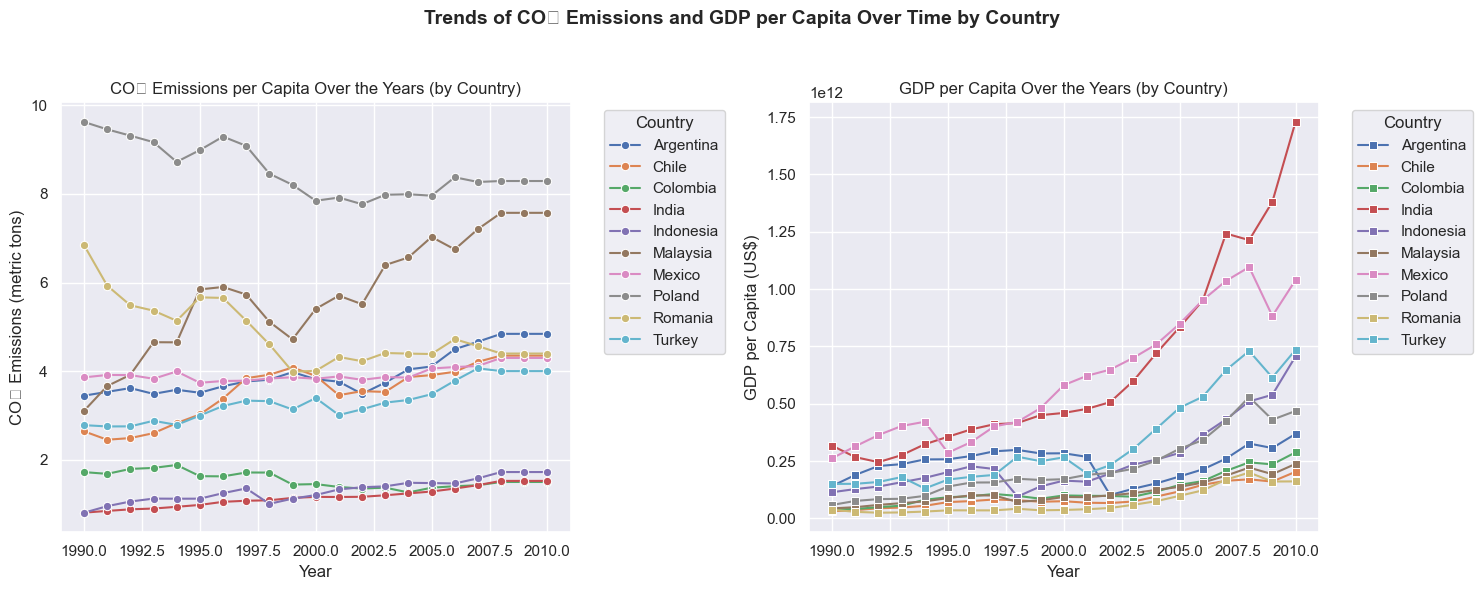

In [112]:
country_col = "Country name"
year_col = "Year"
co2_col = "CO2 emissions per capita (metric tons)"
gdp_col ="GDP ($)"

# Sort values for cleaner plotting 
plot_df = plot_df.sort_values(by=[country_col, year_col])

# Create a figure with 2 subplots (side by side) 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# Plot 1: CO₂ emissions per capita over years

sb.lineplot(
    data=plot_df,
    x=year_col,
    y=co2_col,
    hue=country_col,
    marker="o",
    ax=axes[0]
)
axes[0].set_title("CO₂ Emissions per Capita Over the Years (by Country)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("CO₂ Emissions (metric tons)")
axes[0].legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")


# Plot 2: GDP per capita over years

sb.lineplot(
    data=plot_df,
    x=year_col,
    y=gdp_col,
    hue=country_col,
    marker="s",
    ax=axes[1]
)
axes[1].set_title("GDP per Capita Over the Years (by Country)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP per Capita (US$)")
axes[1].legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

# Layout adjustments

plt.suptitle("Trends of CO₂ Emissions and GDP per Capita Over Time by Country",
             fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [113]:
climate_vars = ["CO2 emissions per capita (metric tons)", "Energy use per capita (kilograms of oil equivalent)", "Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)", "GHG net emissions/removals by LUCF (MtCO2e)"]
living_vars  = ["Access to improved sanitation (% of total pop.)", "Cereal yield (kg per hectare)", "Foreign direct investment, net inflows (% of GDP)", "GDP ($)", "GNI per capita (Atlas $)","Invest. in energy w/ private participation ($)","Invest. in telecoms w/ private participation ($)","Invest. in transport w/ private participation ($)","Invest. in water/sanit. w/ private participation ($)","Nationally terrestrial protected areas (% of total land area)","Paved roads (% of total roads)","Population","Population growth (annual %)"]

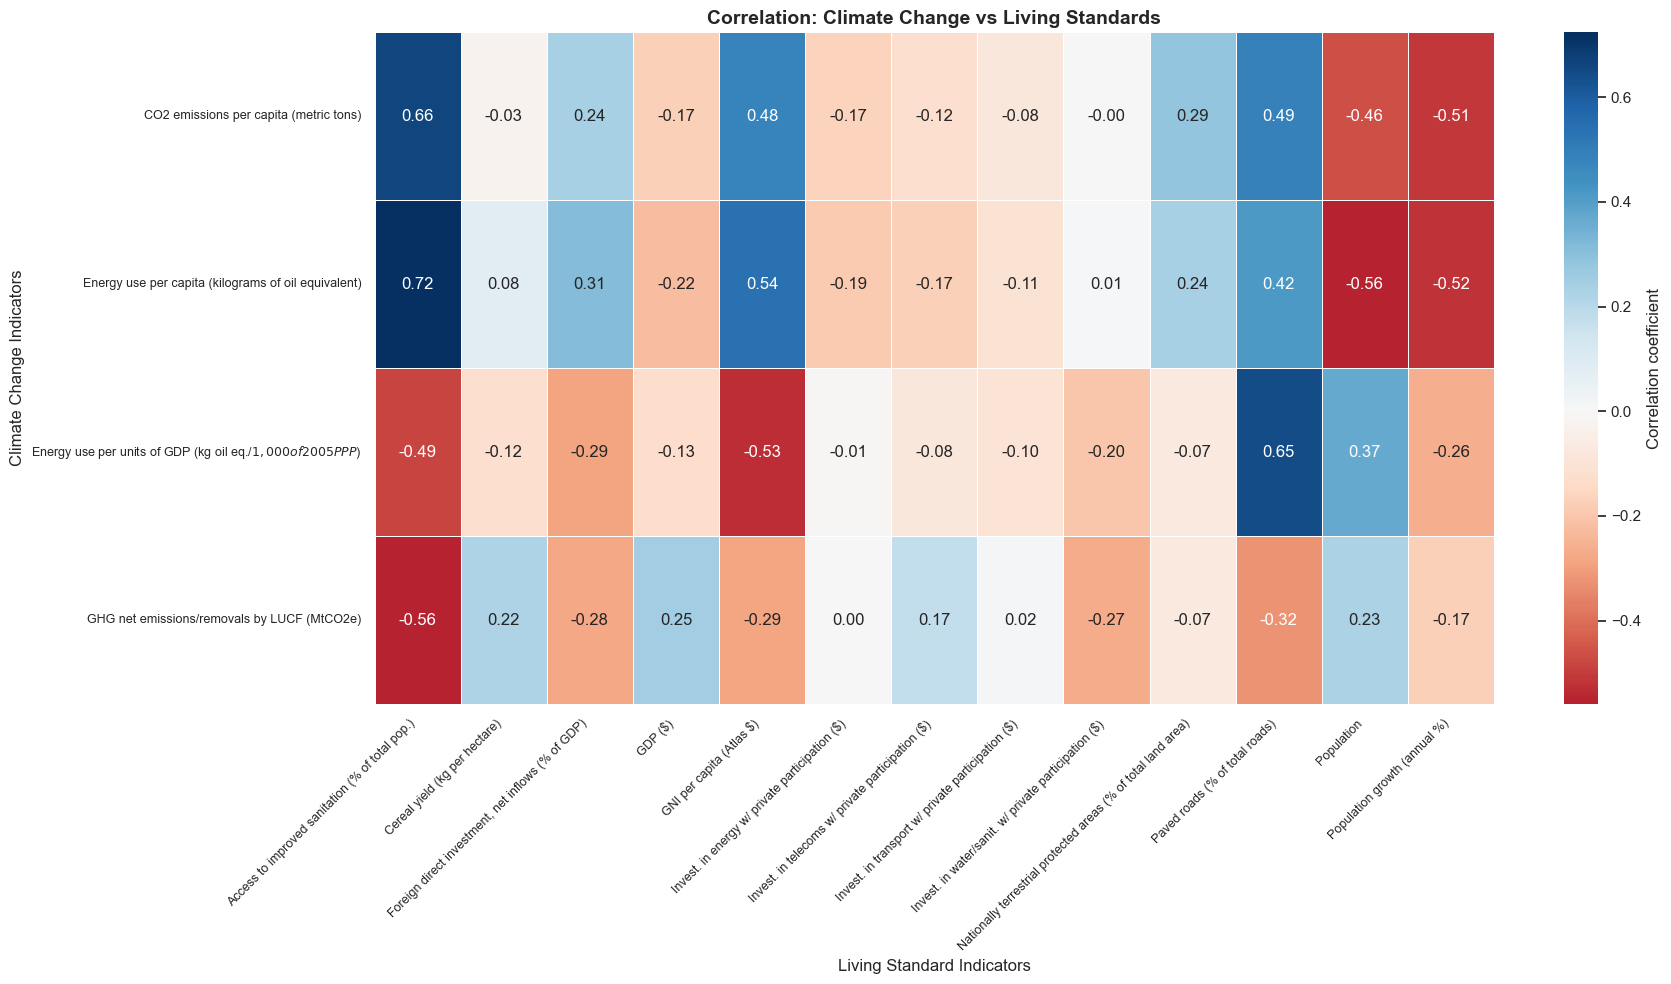

In [114]:
plt.figure(figsize=(18,10))   # wider and taller
sb.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation coefficient'}
)

# Rotate x labels and align neatly
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title("Correlation: Climate Change vs Living Standards", fontsize=14, fontweight="bold")
plt.xlabel("Living Standard Indicators", fontsize=12)
plt.ylabel("Climate Change Indicators", fontsize=12)
plt.tight_layout()
plt.show()


### Positive Relationship
#### Improved living standards (higher GDP, infrastructure, access to resources) are still heavily dependent on energy use and fossil-fuel consumption — leading to higher emissions. Economic progress and industrialization are therefore closely tied to environmental impact.

### Negative Relationship 
#### While economic growth raises living standards, unchecked emissions can harm environmental health and long-term sustainability, indirectly reducing quality of life through pollution, climate risk, and public health impacts.

### Summary
#### The positive correlations suggest that countries achieving better living standards (higher GDP, infrastructure, utilities) are also those emitting more CO₂ and consuming more energy.

#### The negative correlations indicate that as emissions rise, sustainability and environmental quality decline, showing potential long-term threats to living conditions.

#### This dual trend highlights the development–sustainability trade-off:

#### Economic growth improves life in the short term but worsens climate conditions, which can threaten future well-being.

#### The correlation analysis demonstrates that improvements in living standards — reflected by higher GDP, better infrastructure, and increased access to services — are closely associated with higher energy use and CO₂ emissions. This suggests that economic growth remains heavily dependent on carbon-intensive development. However, the negative relationships with population growth and sanitation imply that excessive emissions may degrade environmental and social conditions over time. Therefore, while climate change and economic progress are currently intertwined, achieving sustainable living standards will require decoupling growth from emissions through cleaner energy and efficient infrastructure.